# Coffee Usage

### Authors: 
- Christian Michelsen (Niels Bohr Institute)
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 07-11-2018 (latest update)

***

Python notebook for analysing the coffee usage in the NBI group.

For a period in 2009-2010, the usage of the old coffey machine in the NBI HEP group was (somewhat irregularly) monitored. Below is the count of total number of cups of coffey brewed at given dates.


- 28479   4/11-2009     NOTE: This day, we in the following define as day 0! 
- 28674  13/11-2009 
- 28777  18/11-2009 
- 28964  25/11-2009 
- 29041  27/11-2009 
- 29374  10/12-2009 
- ~29650   8/ 1-2010
- 30001  29/ 1-2010 (?)
- 30221   8/ 2-2010
- 30498  21/ 2-2010
- 32412  17/ 5-2010
- 33676  11/ 8-2010
- 34008   9/ 9-2010`

***

First, we import the modules we want to use:


In [2]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from probfit import BinnedLH, Chi2Regression, Extended # Helper tool for fitting
import sys                                         # Modules to see files and folders in directories
from scipy import stats

load the external functions:

In [3]:
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

and define the parameters of the program:

In [4]:
save_plots = False

## Functions:

First we define a simple linear function:

In [5]:
def func_coffee_simple(x, p0, p1): 
    return p0 + p1*x

Now we add an extra parameter, which is the length of the vacation:

In [6]:
def func_coffee_advanced(x, p0, p1, p2):
    
    # Define when the vacation is (i.e. which points are before and which are after).
    # This could in itself be a fitting parameter, but for now we keep things simple.
    start_vacation = 40.0
    
    if (x < start_vacation):
        return p0 + p1*x
    
    elif (start_vacation < x < start_vacation+p2):
        return p0 + p1*start_vacation
    
    else:
        return p0 + p1*x - p1*p2

# Numpy-way of "vectorizing" the function above
func_coffee_advanced_vec = np.vectorize(func_coffee_advanced)

The reason why we are using the last line is to allow `func_coffee_advanced` to take Numpy arrays as inputs, so we do not have to loop over entire lists.

We also make a small function which calculates the $\chi^2$ value given the x values `x`, the `y` values, the errors on the y values `sy`, the function `function` and the fit parameters `fitargs`:

In [7]:
def chi2_val(xs, ys, sys, function, *fitargs):
    
    chi2 = 0
    N_entries = 0
    
    for x, y, sy in zip(xs, ys, sys):
        
        if y > 0:
        
            f = function(x, *fitargs)
            chi2 +=  ((y - f) / sy)**2
            N_entries += 1
    
    return chi2, N_entries

## Coffee Usage

Data set (So small that we will not use a seperate file for it!). We define 4th of November 2009 to be day 0, and count from there.

In [8]:
days = np.array([     0,     9,    14,    21,    23,    36,    65,    76,    86,    99,   194,   280,   309 ])
cups = np.array([ 28479, 28674, 28777, 28964, 29041, 29374, 29650, 30001, 30221, 30498, 32412, 33676, 34008 ])
edays = np.zeros_like(days)
ecups = np.ones_like(cups)*30.0 # I estimate the uncertainty to be 30 cups, but perhaps you disagree?

for day, cup in zip(days, cups):
    print(f"days: {day:3.0f}    cups: {cup:5.0f}")

days:   0    cups: 28479
days:   9    cups: 28674
days:  14    cups: 28777
days:  21    cups: 28964
days:  23    cups: 29041
days:  36    cups: 29374
days:  65    cups: 29650
days:  76    cups: 30001
days:  86    cups: 30221
days:  99    cups: 30498
days: 194    cups: 32412
days: 280    cups: 33676
days: 309    cups: 34008


## Fit and plot histogram on screen:

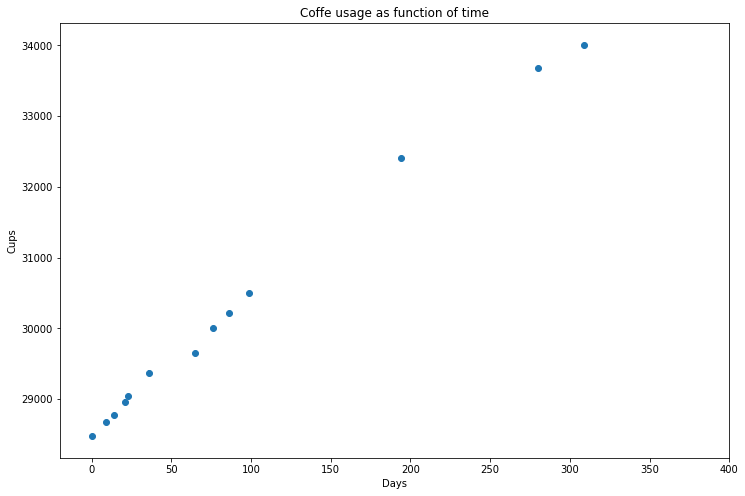

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(days, cups, xerr=edays, yerr=ecups, fmt='o', label='Data')
ax.set(xlim=(-20, 400), xlabel='Days', ylabel='Cups', title='Coffe usage as function of time');

## Simple fit:
Fit a simple linear function between (40, 110):

In [10]:
xmin, xmax = 40, 110
mask_range = (xmin < days) & (days < xmax)

# fit the data points in the range (xmin, xmax)
chi2_object_coffee = Chi2Regression(func_coffee_simple, days[mask_range], cups[mask_range], ecups[mask_range])
minuit_coffee = Minuit(chi2_object_coffee, pedantic=False, p0=1.0, p1=1.0)
minuit_coffee.migrad(); # fit

p0, p1 = minuit_coffee.args

print("Simple fit")
for name in minuit_coffee.parameters:
    print("Fit value: {0} = {1:.5f} +/- {2:.5f}".format(name, minuit_coffee.values[name], minuit_coffee.errors[name]))

FCN = 4.666433492315972 
 TOTAL NCALL = 40 
 NCALLS = 40 
 
 
 EDM = 1.7677134997479734e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,p0,28086.9,98.6363,,,,,No
1,p1,24.6089,1.19619,,,,,No


Simple fit
Fit value: p0 = 28086.87440 +/- 98.63633
Fit value: p1 = 24.60890 +/- 1.19619


And plot the fit on the data:

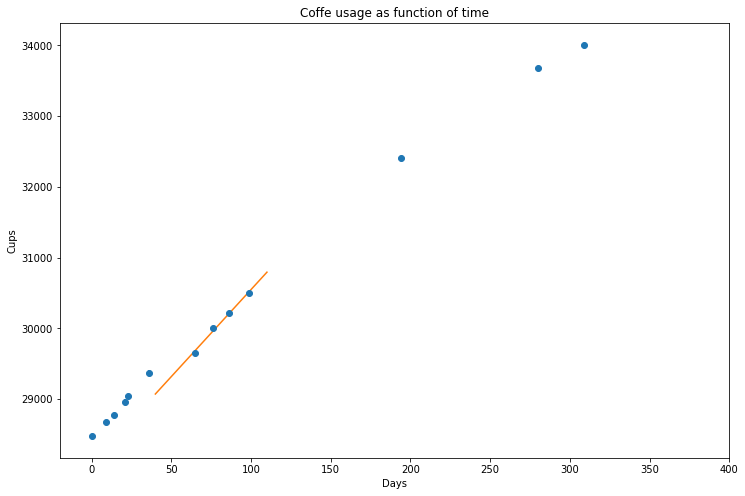

In [11]:
x_fit = np.linspace(xmin, xmax, 1000)
y_fit = func_coffee_simple(x_fit, *minuit_coffee.args)
ax.plot(x_fit, y_fit, '-', label='Simple Fit')
fig

## Advanced fit:
Try to fit the advanced function in the range (-10, 110):

In [12]:
xmin, xmax = -10, 110
mask_range = (xmin < days) & (days < xmax)

# fit the data points in the range (xmin, xmax)
chi2_object_coffee2 = Chi2Regression(func_coffee_advanced, days[mask_range], cups[mask_range], ecups[mask_range])
minuit_coffee2 = Minuit(chi2_object_coffee2, pedantic=False, p0=28500, p1=25, p2=14.0)
minuit_coffee2.migrad(); # fit

p0, p1, p2 = minuit_coffee2.args
print("Advanced fit")
for name in minuit_coffee2.parameters:
    print("Fit value: {0} = {1:.5f} +/- {2:.5f}".format(name, minuit_coffee2.values[name], minuit_coffee2.errors[name]))

FCN = 7.121303872538385 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 3.516170784295897e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,p0,28457.6,18.41,,,,,No
1,p1,24.8861,0.800687,,,,,No
2,p2,15.8056,1.74449,,,,,No


Advanced fit
Fit value: p0 = 28457.62137 +/- 18.41002
Fit value: p1 = 24.88613 +/- 0.80069
Fit value: p2 = 15.80558 +/- 1.74449


and plot the advanced fit:

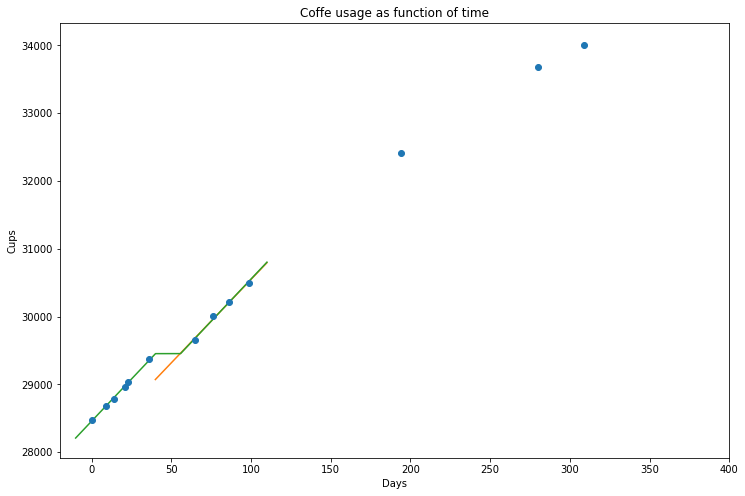

In [13]:
x_fit = np.linspace(xmin, xmax, 1000)
y_fit = func_coffee_advanced_vec(x_fit, *minuit_coffee2.args)
ax.plot(x_fit, y_fit, '-', label='Advanced Fit A')
fig

## Goodness of fit: $\chi^2$
 
Get the $\chi^2$-value. Is shown in two ways, either the naive approach where we calculate it outselves with the function we defined initially in the notebook:

In [13]:
chi2, N_entries = chi2_val(days[mask_range], cups[mask_range], ecups[mask_range], func_coffee_advanced_vec, *minuit_coffee2.args)
print(chi2)

7.121303872538385


or with the small tricks that works when you realize that when we are fitting (at least with a $\chi^2$-fit) we are minimizing the $\chi^2$ value and we can thus just use the function value from the fit:

In [14]:
chi2_b = minuit_coffee2.fval
print(chi2_b)

7.121303872538385


We now find the number of degrees of freedom and the $\chi^2$-probability:

In [15]:
ndof = N_entries - len(minuit_coffee2.args)
chi2_prob =  stats.chi2.sf(chi2, ndof)

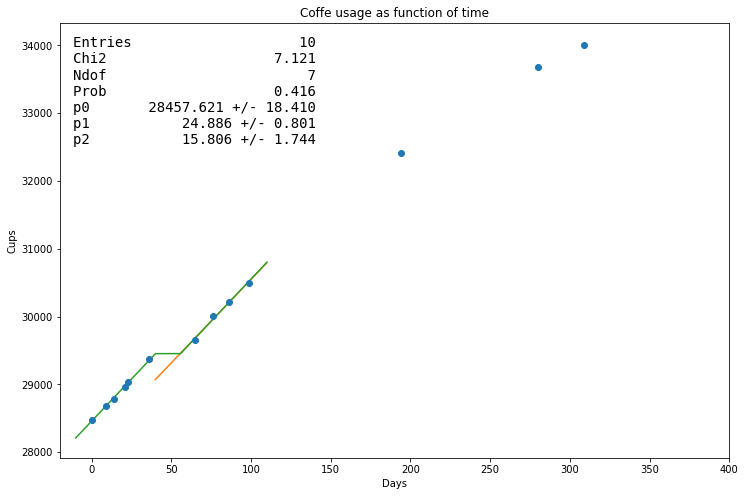

In [16]:
d = {'Entries': N_entries,
     'Chi2': chi2,
     'Ndof': ndof,
     'Prob': chi2_prob,
     'p0': [minuit_coffee2.values['p0'], minuit_coffee2.errors['p0']],
     'p1': [minuit_coffee2.values['p1'], minuit_coffee2.errors['p1']],
     'p2': [minuit_coffee2.values['p2'], minuit_coffee2.errors['p2']],
    }


text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=14)
fig

## Advanced fit, extended range

Now fit an even larger range, from -10 to 210 with the advanced function:

In [17]:
xmin, xmax = -10, 210
mask_range = (xmin < days) & (days < xmax)

chi2_object_coffee3 = Chi2Regression(func_coffee_advanced, days[mask_range], cups[mask_range], ecups[mask_range])
minuit_coffee3 = Minuit(chi2_object_coffee3, pedantic=False, p0=28500, p1=25, p2=14.0)
minuit_coffee3.migrad(); # fit

p0_b, p1_b, p2_b = minuit_coffee3.args
print("Advanced fit")
for name in minuit_coffee2.parameters:
    print("Fit value: {0} = {1:.5f} +/- {2:.5f}".format(name, minuit_coffee3.values[name], minuit_coffee3.errors[name]))

FCN = 32.08049373073602 
 TOTAL NCALL = 76 
 NCALLS = 76 
 
 
 EDM = 2.6335464391853366e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,p0,28522,13.1531,,,,,No
1,p1,21.1378,0.279403,,,,,No
2,p2,7.75427,1.35321,,,,,No


Advanced fit
Fit value: p0 = 28521.98092 +/- 13.15315
Fit value: p1 = 21.13783 +/- 0.27940
Fit value: p2 = 7.75427 +/- 1.35321


and plot the fit:

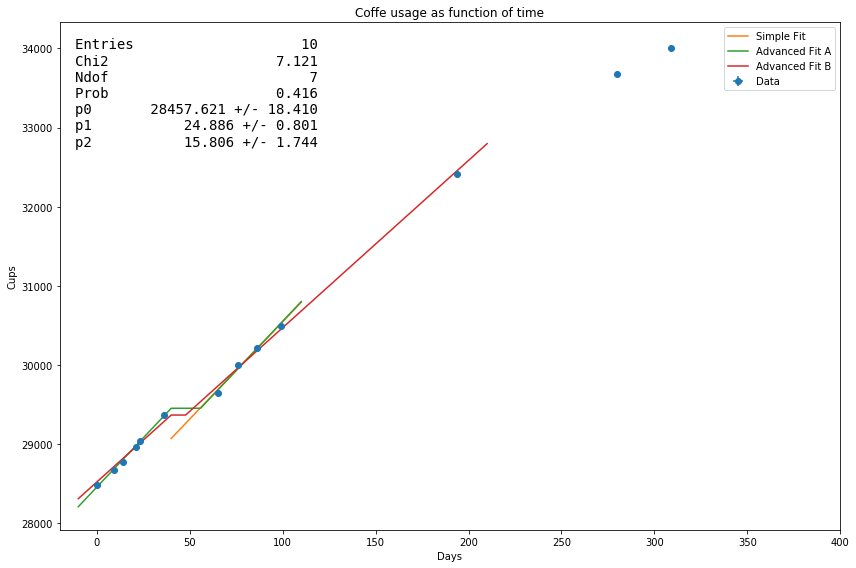

In [18]:
x_fit = np.linspace(xmin, xmax, 1000)
y_fit = func_coffee_advanced_vec(x_fit, *minuit_coffee3.args)
ax.plot(x_fit, y_fit, '-', label='Advanced Fit B')

ax.legend()
fig.tight_layout()

if save_plots:
    fig.savefig('CoffeeUsage.pdf', dpi=600)

fig

Notice the much increased $\chi^2$, which indicates that the fit function does not match the data as well... most likely, there were more vacations, or the warmer spring weather deminished the coffee intake. 

In [21]:
print(f"\n\nThe fitted effective vacation length was: {minuit_coffee2.values['p2']:4.1f} +- {minuit_coffee2.errors['p2']:3.1f} days!\n")



The fitted effective vacation length was: 15.8 +- 1.7 days!



# Questions:

1. Assuming the error of 30 cups, do the numbers follow the hypothesis of constant use? Quantify this, and find out how large the error has to be, for this hypothesis to be credible.

2. Consider only the data from the first 100 days(*). Does taking into account Christmas vacations improve the above hypothesis? Can you actually fit the length of vacation? Try to rewrite the function "func_coffee", such that it includes an "if", dividing the function into two linear functions with the same slope, that has an interval with no usage (i.e. the Christmas vacation).

3. The total number of cups of coffey ever brewed was 36716, after which the old coffey machine was decommissioned. From the above data, estimate when this happened (including error!). And when would you estimate that the coffey machine was commissioned originally?


(*) You can do this, by defining the function range to be 0-100!

***

## Key questions:

- What is the probability that the first 50 days follow a constant usage, assuming the uncertainty of 30 days to be correct?
- How long did you estimate the Christmas vacation to be (including uncertainty)?
- When was the machine commissioned and decommissioned (including uncertainty)?

The original commissioning of the machine was around July 2005 with an uncertainty of around 2 months (source: Esben Klinkby). The new machine commissioning (and thus decommissioning of the old one was on the 15th of March 2011.